<a href="https://colab.research.google.com/github/shrutisj12/AgriSense-AI-Intelligent-Crop-Disease-Assistant/blob/main/AgriSenseAI_Phase1_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🌿 DAY 3 – Model Optimization + Saving + Streamlit App Prep
🎯 Goal:
Improve your model performance, save it for later use, and prepare it for web app deployment.

In [3]:
# 🌾 Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 🌾 Load the Dataset Again
df = pd.read_csv("Crop_recommendation.csv")

# 🌾 Prepare Features and Labels
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

# 🌾 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data reloaded and split successfully.")


✅ Data reloaded and split successfully.


#**Hyperparameter Tuning (Optimization)**


In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Base model
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


#Evaluate the Tuned Model

Accuracy: 0.9931818181818182

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00    

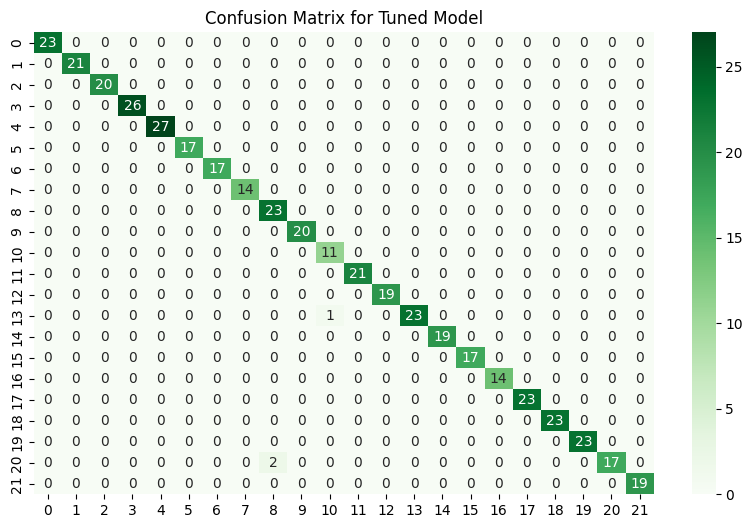

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix for Tuned Model")
plt.show()


#Save Final Model

By Using joblib to save the trained model:

In [6]:
import joblib

joblib.dump(best_model, 'crop_recommendation_model.pkl')
print("✅ Model saved as crop_recommendation_model.pkl")


✅ Model saved as crop_recommendation_model.pkl


#Prepare for Streamlit Integration

In [9]:
sample_input = [[90, 42, 43, 20.5, 82, 6.5, 200]]
prediction = best_model.predict(sample_input)
print("Recommended Crop:", prediction[0])


Recommended Crop: rice


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
